In [0]:
from skimage import io
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [11]:
!unzip '/content/TimelapseImages.zip'

Archive:  /content/TimelapseImages.zip
   creating: TimelapseImages/
  inflating: TimelapseImages/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/TimelapseImages/
  inflating: __MACOSX/TimelapseImages/._.DS_Store  
   creating: TimelapseImages/7-10_AM_Serial/
  inflating: TimelapseImages/7-10_AM_Serial/7-10_AM_P1C10_Serial.jpg  
   creating: __MACOSX/TimelapseImages/7-10_AM_Serial/
  inflating: __MACOSX/TimelapseImages/7-10_AM_Serial/._7-10_AM_P1C10_Serial.jpg  
  inflating: TimelapseImages/7-10_AM_Serial/7-10_AM_P1C1_Serial.jpg  
  inflating: __MACOSX/TimelapseImages/7-10_AM_Serial/._7-10_AM_P1C1_Serial.jpg  
  inflating: TimelapseImages/7-10_AM_Serial/7-10_AM_P1C2_Serial.jpg  
  inflating: __MACOSX/TimelapseImages/7-10_AM_Serial/._7-10_AM_P1C2_Serial.jpg  
  inflating: TimelapseImages/7-10_AM_Serial/7-10_AM_P1C3_Serial.jpg  
  inflating: __MACOSX/TimelapseImages/7-10_AM_Serial/._7-10_AM_P1C3_Serial.jpg  
  inflating: TimelapseImages/7-10_AM_Serial/7-10_AM_P1C4_Serial.jpg  
 

In [0]:
import os
Outer_file_list=os.listdir("/content/TimelapseImages/")
save_dir = '/content/Img_Patches' 
os.mkdir(save_dir)

In [0]:
Outer_file_list.remove('.DS_Store')

In [0]:
# basic image processing functions 
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)
def simple_threshold(im, threshold=128):
    return ((im<threshold) * 255).astype("uint8")

In [0]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [0]:

# temp_res=[]
# for folder_name in Outer_file_list:
#   inner_file_list=os.listdir("/content/TimelapseImages/"+folder_name)
#   #print(inner_file_list)
#   for file_name in inner_file_list:
#     img_path='/content/TimelapseImages/'+folder_name+'/'+file_name
#     img = io.imread(img_path)
#     print(img.shape)
#     plt.figure(figsize=(10,10))
#     plt.imshow(img)
#     h=img.shape[0]
#     w=img.shape[1]
#     radius=600 
#     center=[int(w/2)+160, int(h/2)+120] # how to find the best center and radius requires futher work  
#     mask = create_circular_mask(h, w, center=center,radius=radius)
#     masked_img = img.copy()
#     masked_img[~mask] = 255
#     plt.figure(figsize=(10,10))
#     plt.imshow(masked_img)
#     plt.figure(figsize=(10,10))
#     plt.imshow(masked_img) # munually filter out some boundary white background needs futher
#     temp_res.append(masked_img)
#     break 
#   break  

In [0]:
from skimage.util.shape import view_as_windows
for folder_name in Outer_file_list:
  inner_file_list=os.listdir("/content/TimelapseImages/"+folder_name)
  #print(inner_file_list)
  for file_name in inner_file_list:
    img_path='/content/TimelapseImages/'+folder_name+'/'+file_name
    img = io.imread(img_path)
    h=img.shape[0]
    w=img.shape[1]
    radius=600 
    center=[int(w/2)+160, int(h/2)+120] # how to find the best center and radius requires futher work  
    mask = create_circular_mask(h, w, center=center,radius=radius)
    masked_img = img.copy()
    masked_img[~mask] = 255
#     plt.figure(figsize=(10,10))
#     plt.imshow(masked_img)
    window_shape = (100,100,3) # size of crops needs to be adjusted
    B = view_as_windows(masked_img[1500:2850, 1000:2250], window_shape,step=50)
    
    best_threshold=110 # best threshold needs to be selected 
    for i in range(B.shape[0]):
      for j in range(B.shape[1]):
          object_img=B[i][j][0]
          gray_object_im = to_grayscale(object_img)
          transformed_img_object=simple_threshold(gray_object_im,best_threshold)
          # filter out the negative patch and save the positive patches  
          if(int(transformed_img_object.sum())*1.0/(transformed_img_object.shape[0]*transformed_img_object.shape[1]*255)>0.3): #0.3 canbe futher adjusted
                #print(transformed_img_object.max())
#                 plt.figure(figsize=(7,7))
#                 plt.imshow(transformed_img_object,cmap='Greys')
                io.imsave(save_dir+'/'+folder_name+'_'+file_name+'_'+'{}_{}.jpg'.format(i,j) ,B[i][j][0]) 

In [0]:
patch_file=os.listdir("/content/Img_Patches/")
len(os.listdir("/content/Img_Patches/"))

8757

In [0]:
patch_file_list=os.listdir("/content/Img_Patches/")

In [0]:
combined=''.join(patch_file_list)

In [0]:
pattern=[]
for i in range(1,11):
  for j in ["Serial","Control","Streak"]:
      pattern.append('P1C'+str(i)+'_'+j)

In [0]:
for p in pattern:
  print("{} : {}".format(p,combined.count(p)))

P1C1_Serial : 427
P1C1_Control : 66
P1C1_Streak : 833
P1C2_Serial : 378
P1C2_Control : 66
P1C2_Streak : 499
P1C3_Serial : 239
P1C3_Control : 44
P1C3_Streak : 177
P1C4_Serial : 382
P1C4_Control : 124
P1C4_Streak : 370
P1C5_Serial : 305
P1C5_Control : 112
P1C5_Streak : 240
P1C6_Serial : 452
P1C6_Control : 53
P1C6_Streak : 613
P1C7_Serial : 355
P1C7_Control : 132
P1C7_Streak : 276
P1C8_Serial : 684
P1C8_Control : 91
P1C8_Streak : 1078
P1C9_Serial : 0
P1C9_Control : 18
P1C9_Streak : 0
P1C10_Serial : 223
P1C10_Control : 181
P1C10_Streak : 339


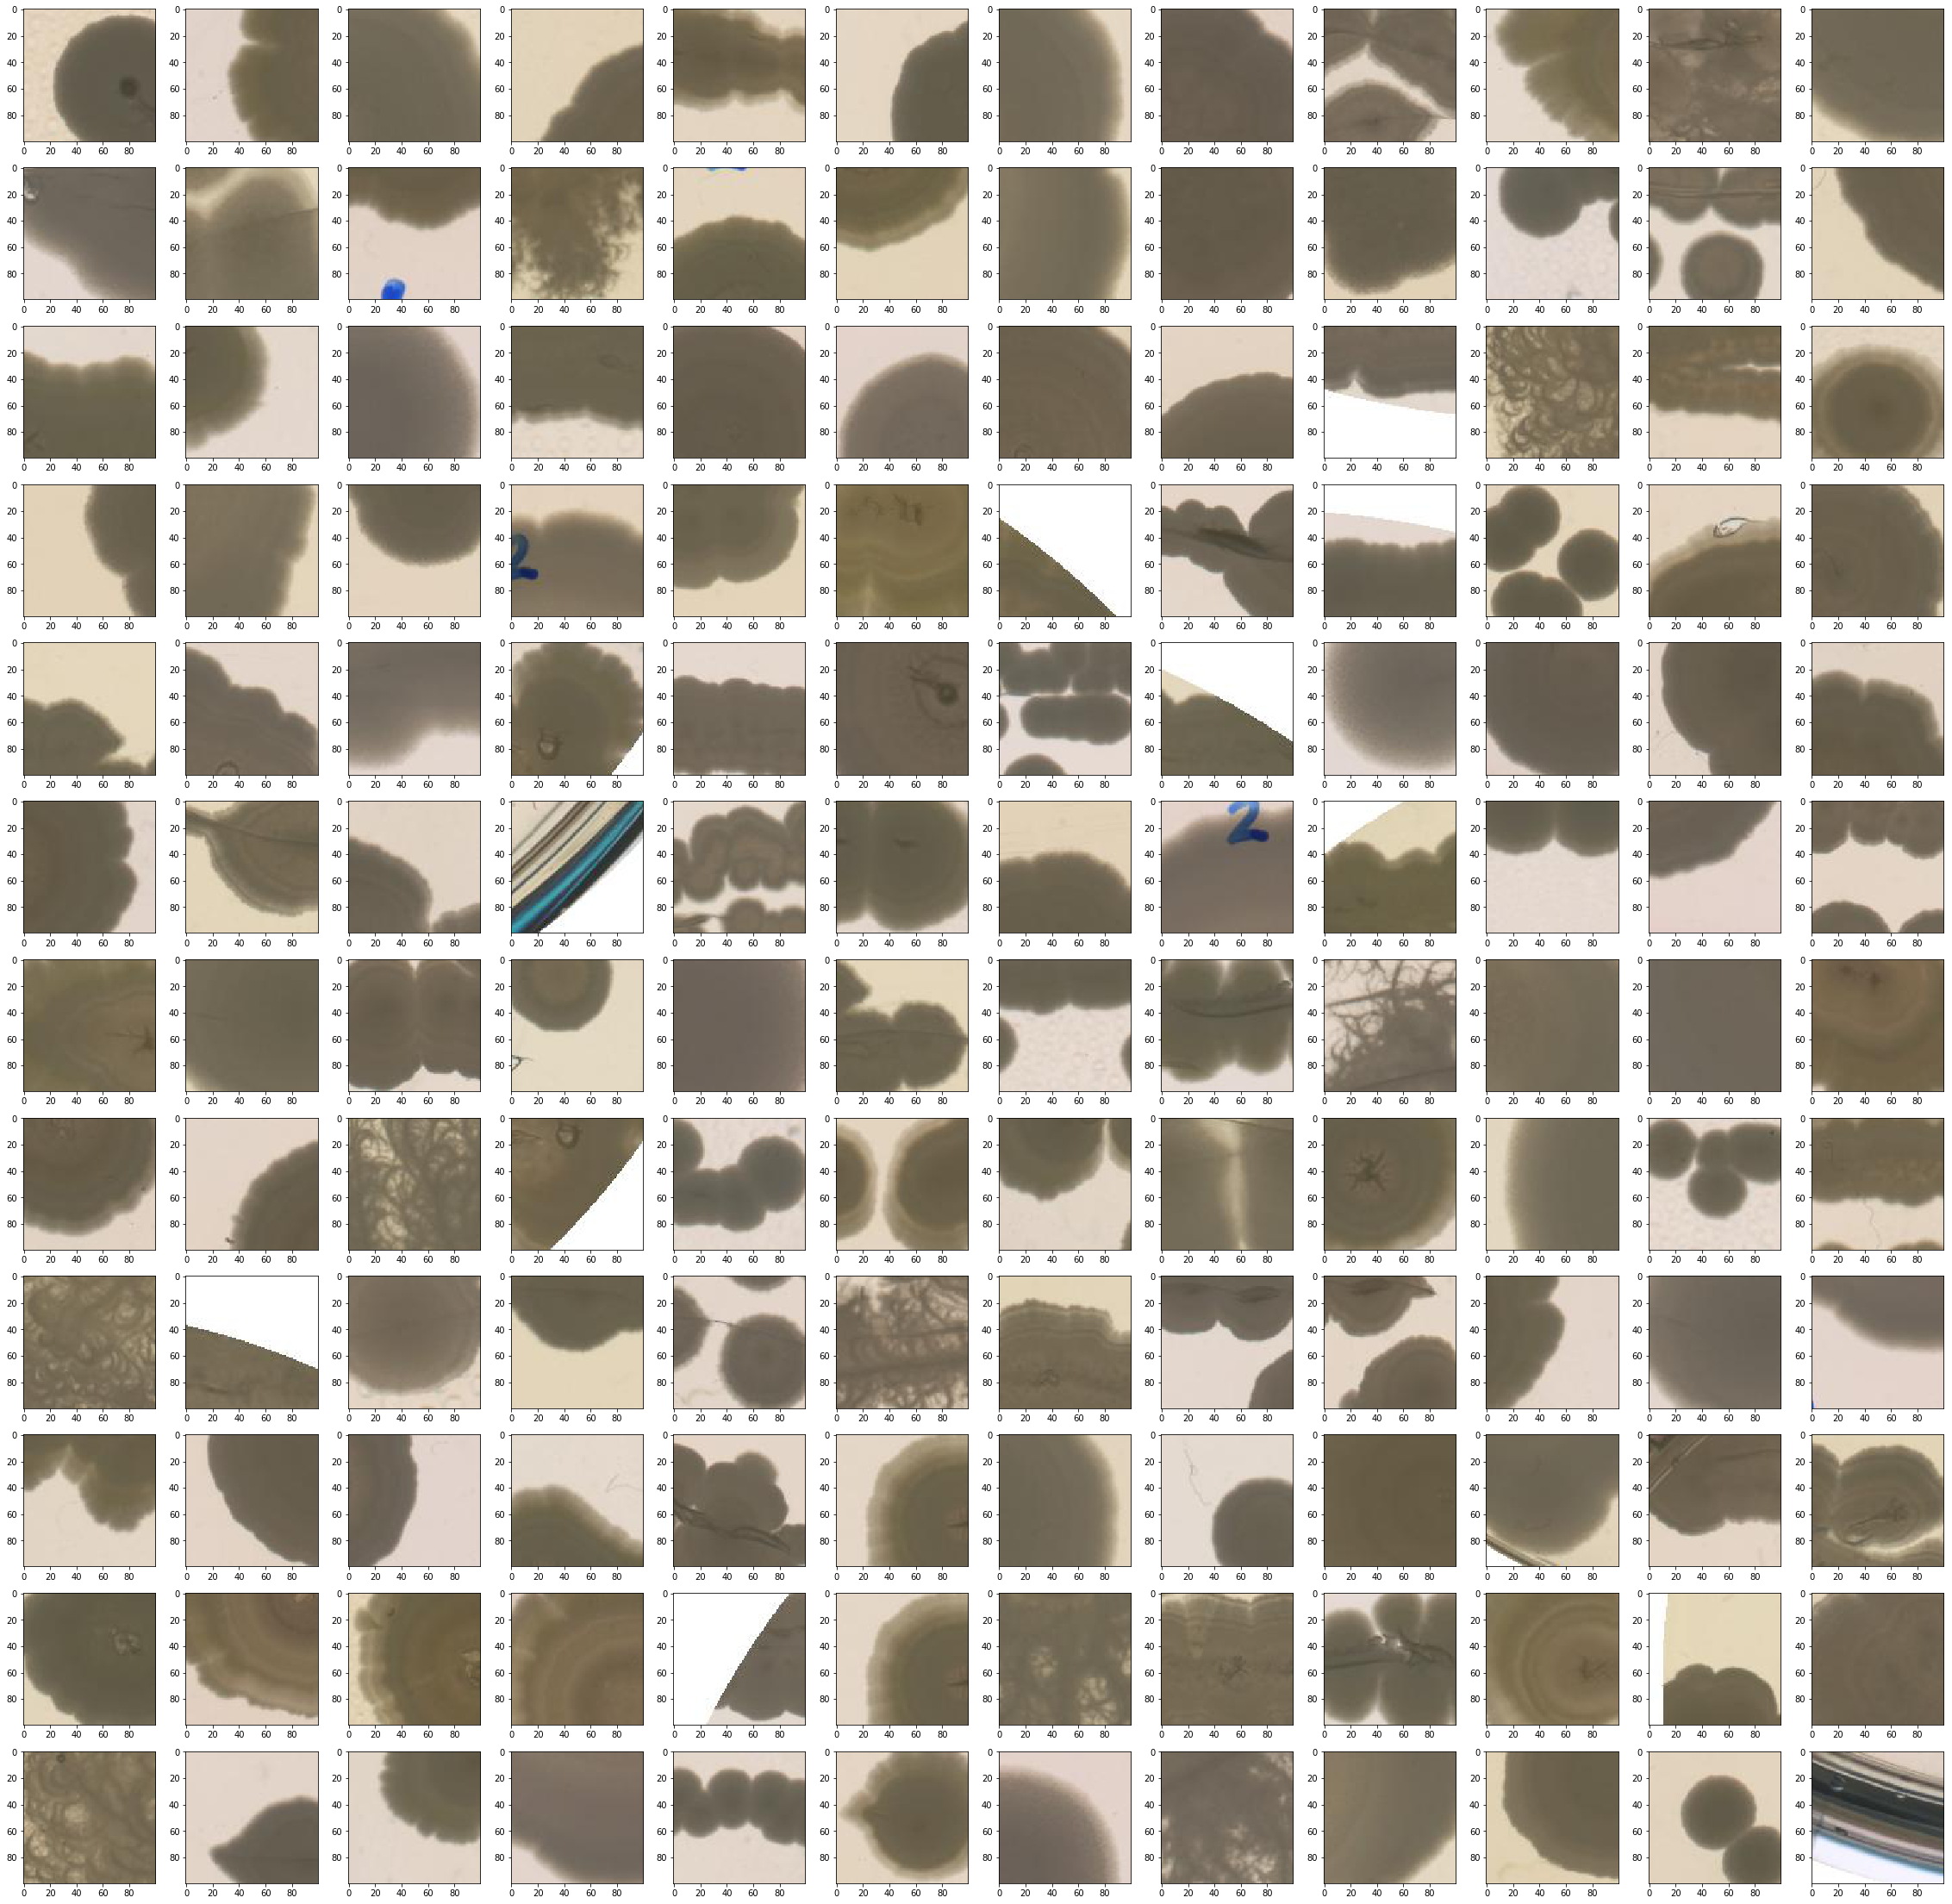

In [0]:
#random check 
temp=np.array(patch_file)[np.random.randint(1,len(patch_file),150)]
layout_row=int(150**(1/2)//1)
fig, axs = plt.subplots(nrows=layout_row, ncols=layout_row, figsize=(40,40));
for i in range(layout_row):
  for j in range(len(temp)//layout_row):
    img=io.imread("/content/Img_Patches/"+temp[i*layout_row+j])
    axs[i][j].imshow(img)
    

In [0]:
from google.colab import files
files.download("/content/patch_show.jpg")

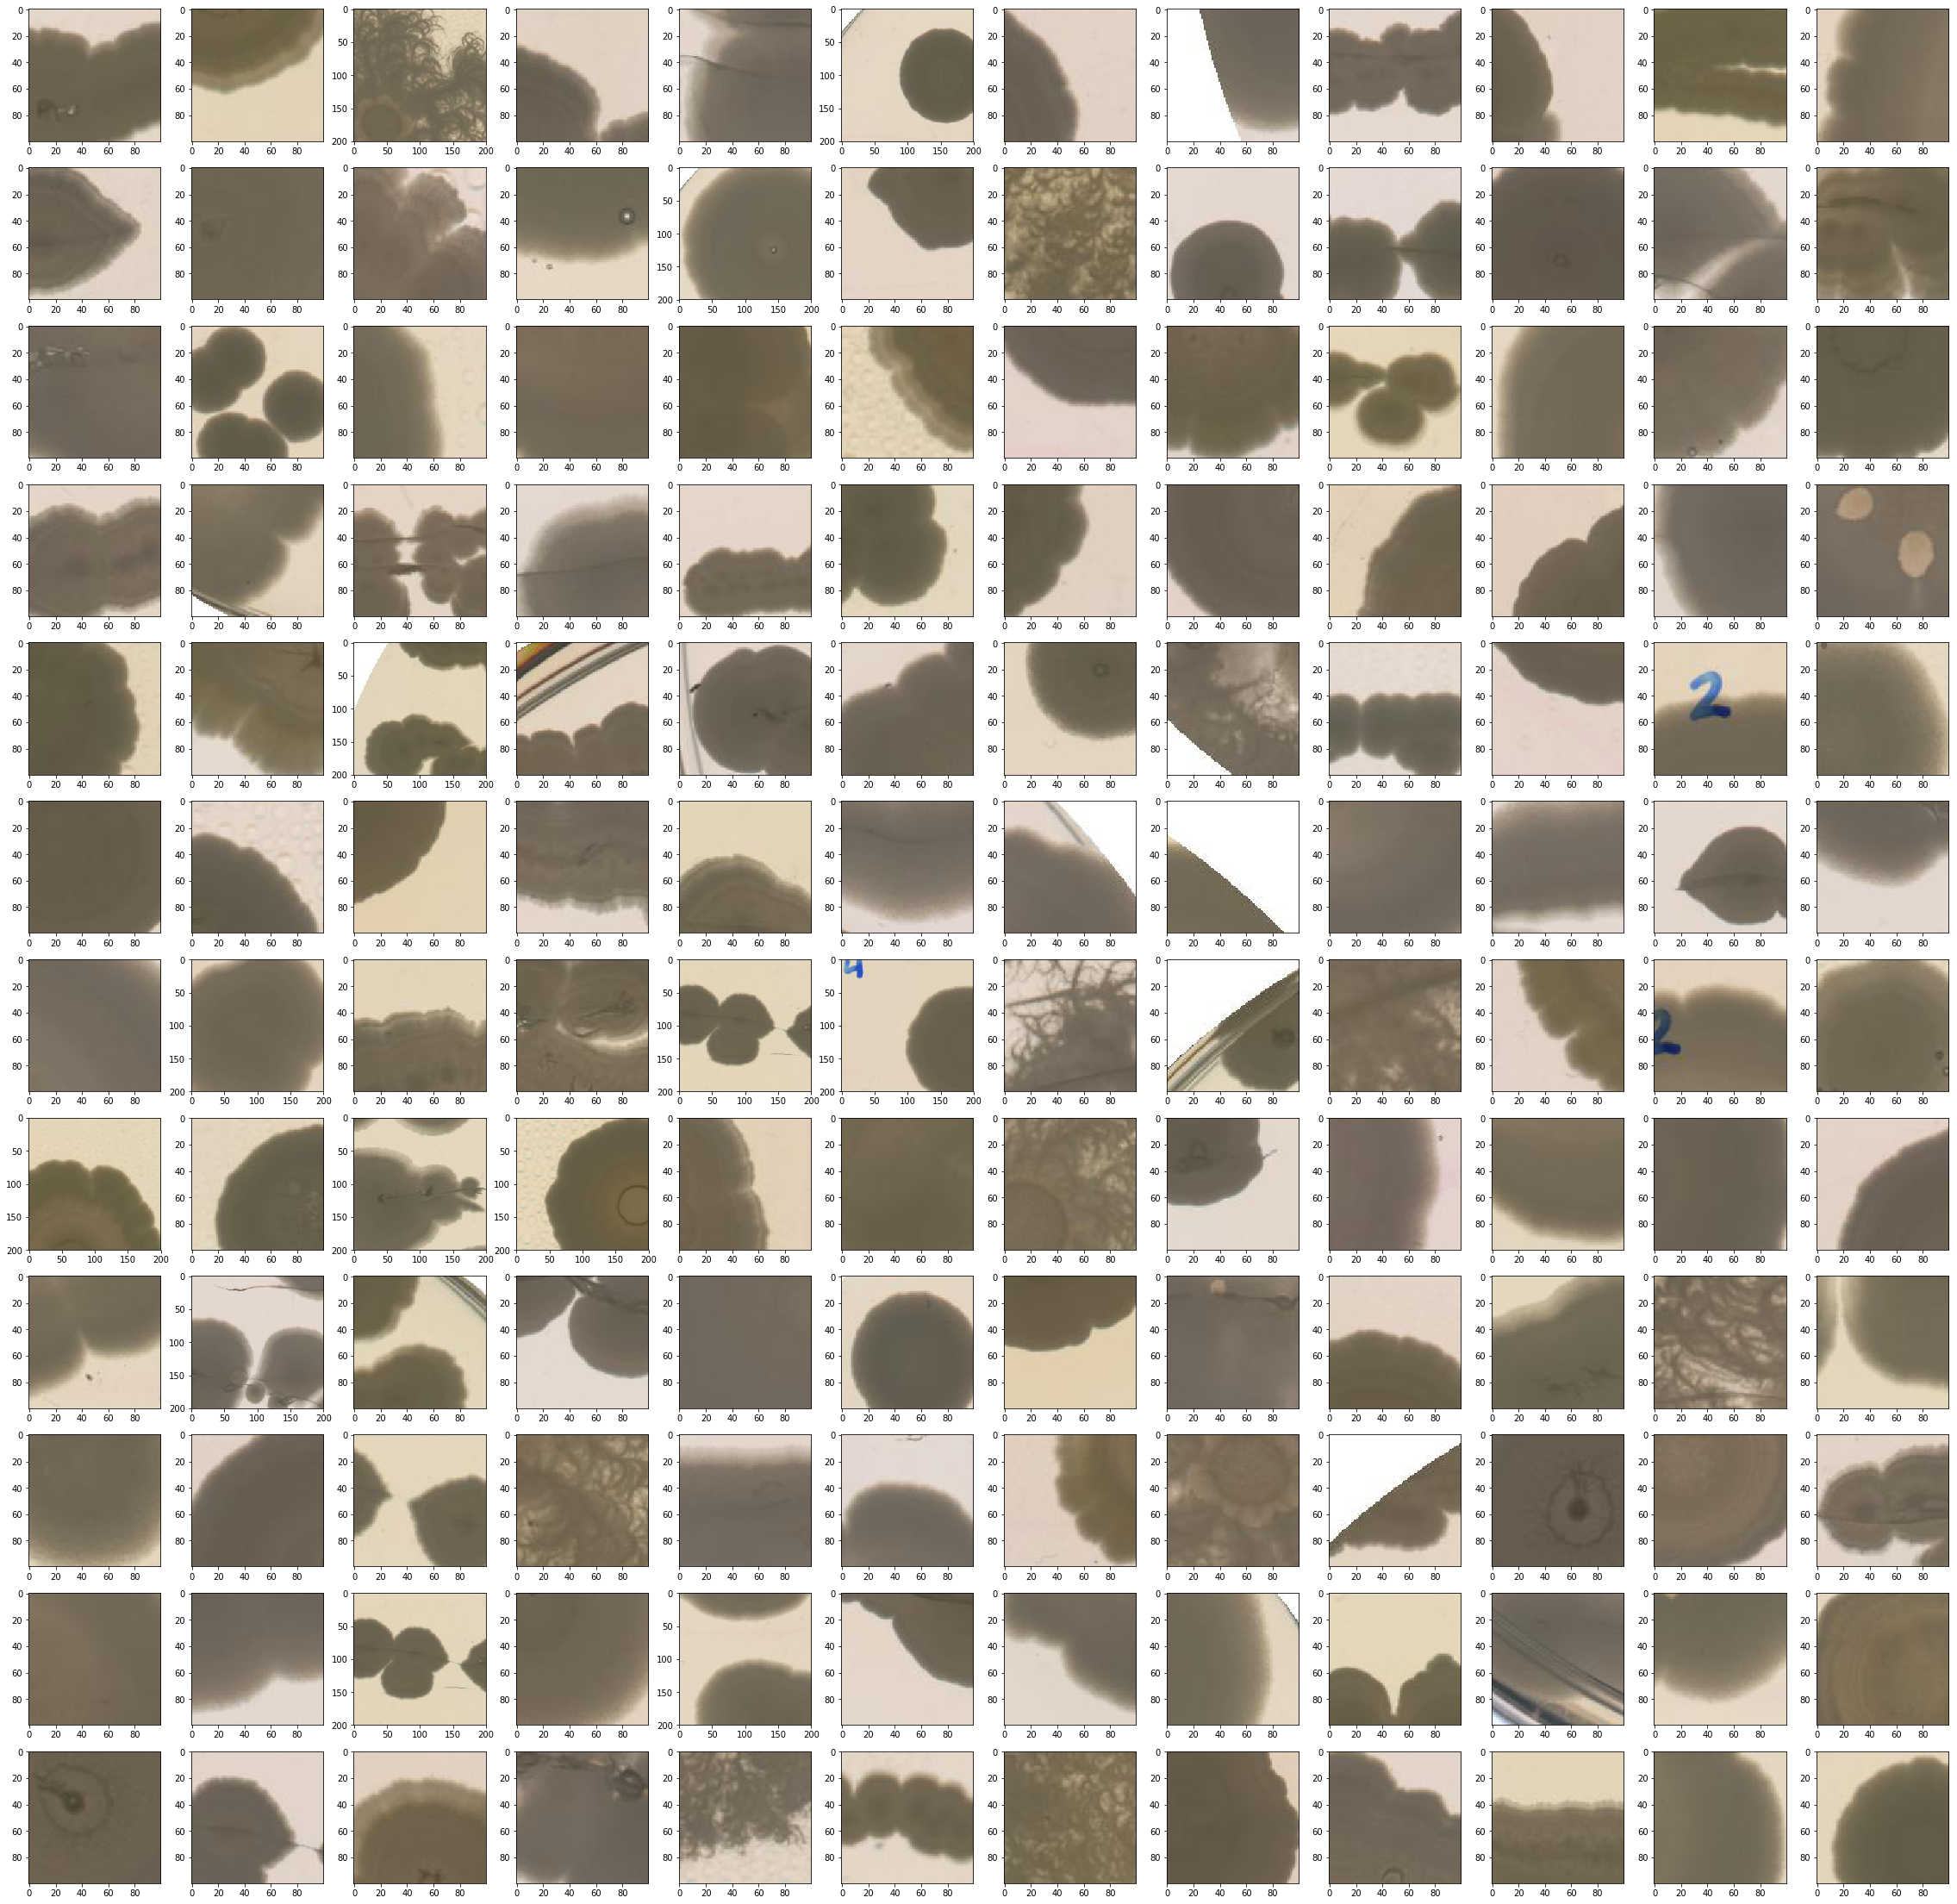

In [0]:
#random check 
temp=np.array(patch_file)[np.random.randint(1,len(patch_file),150)]
layout_row=int(150**(1/2)//1)
fig, axs = plt.subplots(nrows=layout_row, ncols=layout_row, figsize=(40,40));
for i in range(layout_row):
  for j in range(len(temp)//layout_row):
    img=io.imread("/content/Img_Patches/"+temp[i*layout_row+j])
    axs[i][j].imshow(img)
    
plt.savefig("/content/patch_show.jpg")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

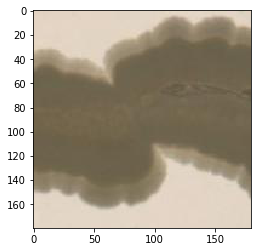

In [0]:
plt.imshow(img)


## Stop running the codes below 

### Create patches of the image

ValueError: ignored

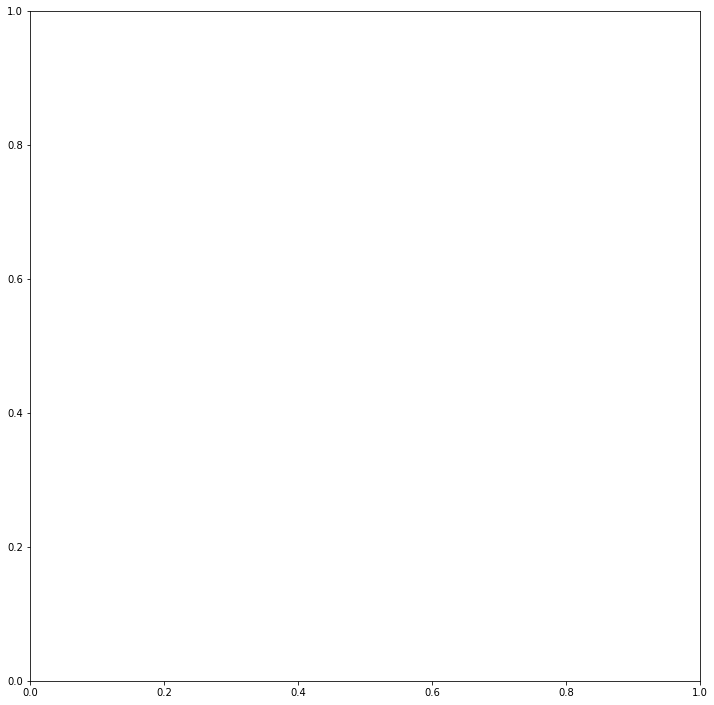

In [0]:
# manually crop the picture 
plt.figure(figsize=(12,15))
plt.imshow(img[1450:2750, 1050:2350])

In [0]:
temp_img=img[1450:2750, 1050:2350]

In [0]:
from skimage.util.shape import view_as_windows
window_shape = (180,180,3) # size of crops 
B = view_as_windows(temp_img, window_shape,step=50)

/usr/local/lib/python3.6/dist-packages/skimage/util/shape.py:246: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


In [0]:
for i in range(B.shape[0]):
  for j in range(B.shape[1]):
    io.imsave(save_dir+'/7-10_AM_P1C1_Serial_{}_{}.jpg'.format(i,j) ,B[i][j][0])

### Whether the patch is positive or not 

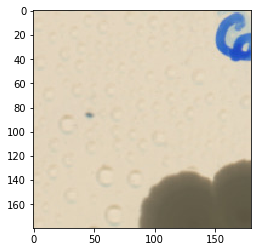

In [0]:
im=B[10][17][0]
#plt.imshow(to_grayscale(im))
plt.figure()
plt.imshow(im)

0
731340
1144695
1214820


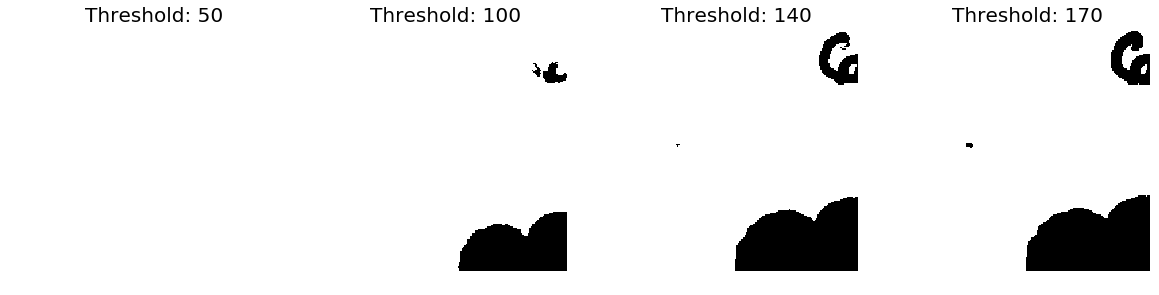

In [0]:

def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)


def simple_threshold(im, threshold=128):
    return ((im<threshold) * 255).astype("uint8")
  
thresholds = [50,100,140,170]
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(im)
                        
for t, ax in zip(thresholds, axs):
    transformed_img=simple_threshold(gray_im, t)
    print(transformed_img.sum())
    ax.imshow(transformed_img, cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();

4590
767805
1990275
2796330


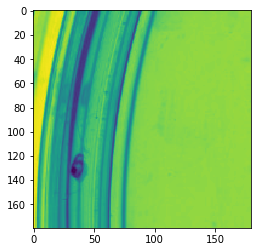

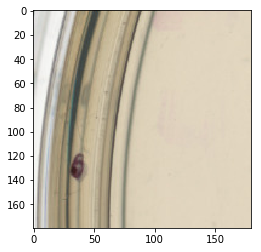

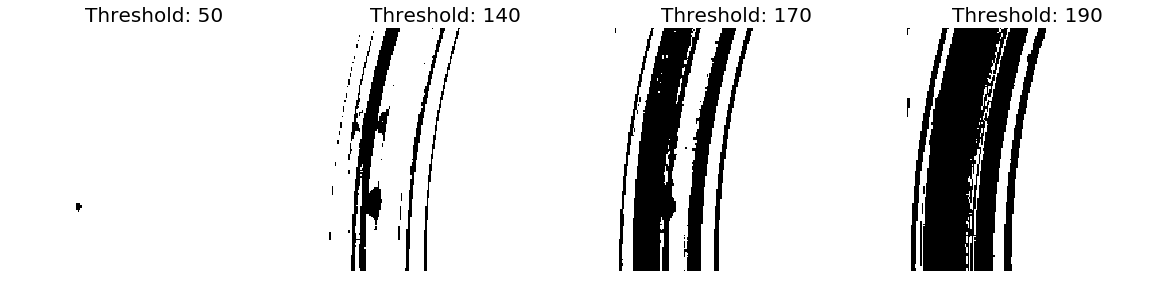

In [0]:
im=B[10][0][0]
plt.figure()
plt.imshow(to_grayscale(im))
plt.figure()
plt.imshow(im)
thresholds = [50,140,170,190]
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(im)
                        
for t, ax in zip(thresholds, axs):
    transformed_img=simple_threshold(gray_im, t)
    print(transformed_img.sum())
    ax.imshow(transformed_img, cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();

### Find the threshold of background and objects

the best threshold is 100
object pixel sum is 1068705
backgound pixel sum is 82620


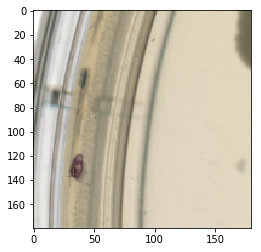

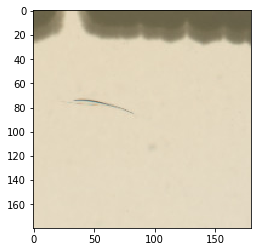

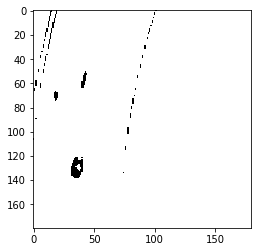

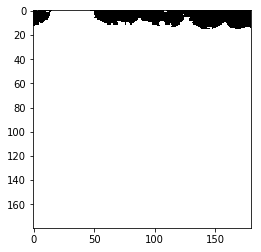

In [0]:
background_img=B[10][0][0]
object_img=B[10][17][0]
# check the two pictures:
plt.figure()
plt.imshow(background_img)
plt.figure()
plt.imshow(object_img)
thresholds = list(range(50,200,10))
gray_background_im = to_grayscale(background_img)
gray_object_im = to_grayscale(object_img)

res=[]
for t in thresholds:
  transformed_img_background=simple_threshold(gray_background_im, t)
  transformed_img_object=simple_threshold(gray_object_im, t)
  res.append(abs(int(transformed_img_object.sum())-int(transformed_img_background.sum()))/abs(int(transformed_img_background.sum())))

best_threshold=thresholds[res.index(max(res))]
print("the best threshold is {}".format(thresholds[res.index(max(res))]))

transformed_img_background=simple_threshold(gray_background_im, best_threshold)

background_threshold=transformed_img_background.sum()
print("object pixel sum is {}".format(transformed_img_object.sum()))
print("backgound pixel sum is {}".format(background_threshold))
transformed_img_object=simple_threshold(gray_object_im,  best_threshold)

plt.figure()
plt.imshow(transformed_img_background, cmap='Greys')

plt.figure()
plt.imshow(transformed_img_object, cmap='Greys')

In [0]:
1068705/(82620+1068705)

0.9282392026578073

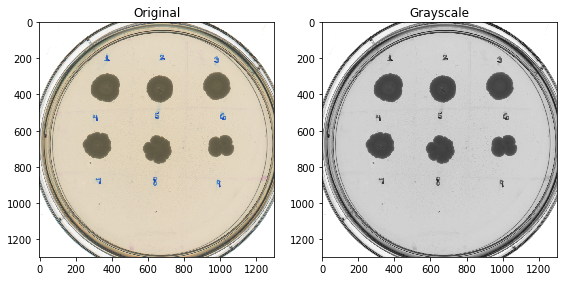

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(temp_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(temp_img)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [0]:
grayscale.min()

0.13094274509803921

In [0]:
grayscale<0.5

(1300,)

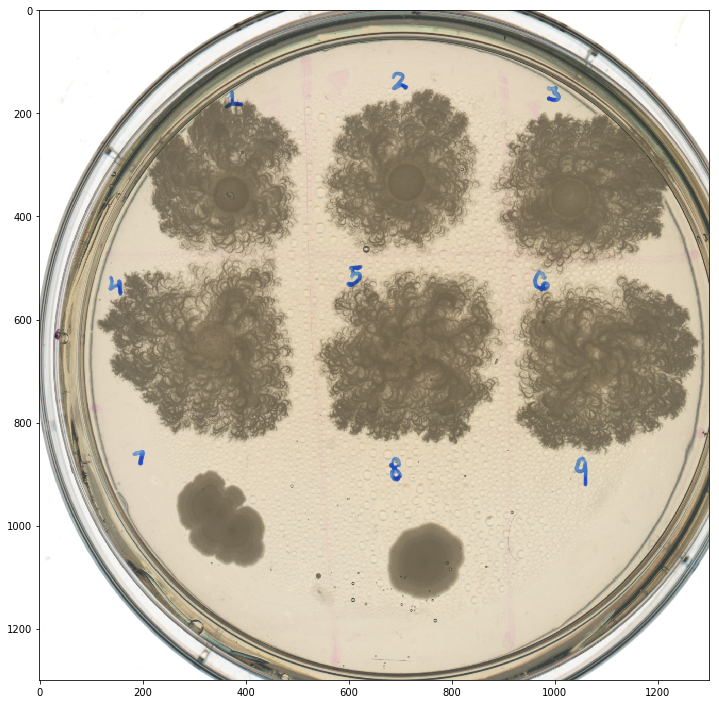

In [0]:
plt.figure(figsize=(12,15))
#plt.imshow(img2)
plt.imshow(img2[1450:2750, 1050:2350])